# Ensemble Learning

1.Can we use Bagging for regression problems?
  - Yes, Bagging works for both** classification and regression**. For regression, it averages predictions form multiple base regressors to raduce variance.

2.What is the difference between multiple model training and single model training?
  - Single model training: One algorithm learns from all data.
  - Multiple model training: Serveral models sre tarined (e.g., in Bagging or Boosting) and combined to make a final prediction, often improving performance and robustness.

3.Explain the concept of feature randomness in Random Forest.
  - At each split in a tree, Random Forest considers only a random subset of feature, not all features. This reduces correlation between tree and improves generalization.

4.What is OOB (Out-of-Bag) Score?
  - An internal validation score calculated using the data not selected in the bootstrap sample for each tree. It gives an unbiased estimate of model accuracy without using a validation set.

5.How can you measure the importance of feature in a Random Forest model?
  - Based on how much each feature reduces impurity (e.g., Gini or MSE) across all trees.
  - Or via permutation importance, where feature are shuffled to observe the change in accuracy.

6.Explain the working principle of a Bagging Classifier.
  - Bagging (Boostrap Aggregating) tarin multiple classifiers on random boostrap samples and aggregates their predictions via majority voting for claddification.

7.How do you working principle of a Bagging Classifier.
  - Use metrics like accuracy, precision, recall F1-score on a test det.
  - OOB score can also be used as a built-in evaluation metric.

8.How do you evaluate a Bagging Classifier's performance?
  - Like the Bagging Classifier, but for regression: multiple regressors are tarined on different bootstap sample, and their outputs are averaged to make the final prediction.

9.What is the main advantage of ensemble techniques?
  - They combine multiple weak or base learners to produce a model with better accuracy, robustness, and generalization than any individual model.

10.What is the main challenge of ensemble methods?
  - Increased computational complexity and training time.
  - May lose interpretability doe to model complexity.

11.Explain the key idea behind ensemble techniques.
  - the idea is that a group of diverse models working together can make more accurate and stable predictions than individual models.

12.What is a Random Forest Classifier?
  - An ensemble ,ethod that builds multiple decision trees using bagging and random feature selection, and combines their output via majority voting.

13.What are the main types of ensemble techniques.
  - **Bagging** (e.g., Random Forest)
  - **Boosting** (e.g., AdaBoost, XGBoost)
  - **Stacking** (meta-model ;earns to combine base models)

14.What is ensemble learning in machine learning?
  - It refers to combining multiple models(often weak kearners) to create a stronger overall model with better predictive performance.

15.When should we avoid using ensemble methods?
  - When the data is samll or simple, and a single model performs well.
  - When interpretability is more impottance than accuracy.
  - When computational resources are limited.

16.How does Bagging help in reducing overfitting?
  - by averaging predictions from multiple models trained on different samples, Bagging reduces variance, which helps prevent overfitting.

17.Why is Random Forest better than a single Decision Tree?
  - Random Forest reduces overfitting by averaging multiple de-correlated tree, leading to more accurate and stable predictions.

18.What is the role of bootstrap sampling in Bagging?
  - boostsrap sampling creates diverse training sets by sampling eith replacement, which helps generate diverse models for averaging.

19.What are some real-word application of ensemble techniques?
  - Fraud detection
  - spam filtering
  - credit scoring
  - Image and speech recognition
  - Medical diagnosis
  - Recommender systems

20.What is the difference between Bagging and Boosting?
   - Bagging (Bootstrap Aggregating) trains multiple models independently and in parallel on different subsets of the data, then combines their predictions to reduce variance and improve accuracy.

   - Boosting trains models sequentially, where each subsequent model focuses on correcting the errors made by the previous models. This process aims to reduce bias and improve overall predictive power.

In essence:

   - Bagging: Reduces variance, combines independent models.
   - Boosting: Reduces bias, combines dependent models.

# Practical


21.Train a Bagging Classifier using Decision Tree on a sample dataset and print model accuracy.

In [43]:
# prompt: 21.Train a Bagging Classifier using Decision Tree on a sample dataset and print model accuracy.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.88


22.Train a Bagging Regressor using Decision Tree and evaluate using Mean Squared Error (MSE).

In [40]:
# prompt: 22.Train a Bagging Regressor using Decision Tree and evaluate using Mean Squared Error (MSE).

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Regressor with Decision Tree as the base estimator
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 15815.26660224182


23.Train a Bagging Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [41]:
# prompt: 23.Train a Bagging Forest Classifier on the Breast Cancer dataset and print feature importance scores.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a BaggingClassifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Print feature importances
for i, feature_name in enumerate(data.feature_names):
    print(f"Feature {feature_name}: {bagging_clf.estimators_[0].feature_importances_[i]}")


Feature mean radius: 0.0
Feature mean texture: 0.0
Feature mean perimeter: 0.0
Feature mean area: 0.0
Feature mean smoothness: 0.1091620554456564
Feature mean compactness: 0.0
Feature mean concavity: 0.0
Feature mean concave points: 0.0007920740074847743
Feature mean symmetry: 0.0
Feature mean fractal dimension: 0.0
Feature radius error: 0.0
Feature texture error: 0.0
Feature perimeter error: 0.0
Feature area error: 0.01217281931771844
Feature smoothness error: 0.0
Feature compactness error: 0.0
Feature concavity error: 0.0
Feature concave points error: 0.0
Feature symmetry error: 0.0
Feature fractal dimension error: 0.0
Feature worst radius: 0.0
Feature worst texture: 0.05498416241812524
Feature worst perimeter: 0.7647461759849019
Feature worst area: 0.03965615560652128
Feature worst smoothness: 0.009175836095889721
Feature worst compactness: 0.009310721123702128
Feature worst concavity: 0.0
Feature worst concave points: 0.0
Feature worst symmetry: 0.0
Feature worst fractal dimension:

24.Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [36]:
# prompt: 24.Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}")

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")

# Compare performance
print(f"Random Forest outperforms Decision Tree by {dt_mse - rf_mse} in terms of MSE")


Decision Tree MSE: 36143.34306676809
Random Forest MSE: 15965.304970831752
Random Forest outperforms Decision Tree by 20178.038095936336 in terms of MSE


25.Compute the Out-of-Bag(OOB) Score for a random Forest Classifier.

In [35]:
# prompt: 25.Compute the Out-of-Bag(OOB) Score for a random Forest Classifier.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with OOB scoring enabled
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

# Train the model
rf_classifier.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_classifier.oob_score_
print(f"Out-of-Bag (OOB) Score: {oob_score}")


Out-of-Bag (OOB) Score: 0.9075


26.Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [34]:
# prompt: 26.Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with SVM as the base estimator
bagging_clf = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42) # Reduced n_estimators for faster execution

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.92


27.Train a Random Forest Classifier with different numbers of tree and compare accuracy.

In [31]:
# prompt: 27.Train a Random Forest Classifier with different numbers of tree and compare accuracy.

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of trees to try
n_estimators_list = [10, 50, 100, 200]

for n_estimators in n_estimators_list:
  # Create and train a Random Forest Classifier
  rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
  rf_classifier.fit(X_train, y_train)

  # Make predictions
  y_pred = rf_classifier.predict(X_test)

  # Calculate the accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with {n_estimators} trees: {accuracy}")


Accuracy with 10 trees: 0.956140350877193
Accuracy with 50 trees: 0.9649122807017544
Accuracy with 100 trees: 0.9649122807017544
Accuracy with 200 trees: 0.9649122807017544


28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [33]:
# prompt: 28.Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Logistic Regression as the base estimator
bagging_clf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred_prob = bagging_clf.predict_proba(X_test)[:, 1] # Probability of positive class

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc}")


AUC Score: 0.9111802488960257


29.Train a Random Forest Regressor and analyze feature importance scores.

In [28]:
# prompt: 29.Train a Random Forest Regressor and analyze feature importance scores.

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Print feature importance scores
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


Feature 0: 0.06904293598595823
Feature 1: 0.009042337559013909
Feature 2: 0.14309732660571184
Feature 3: 0.20122708290912694
Feature 4: 0.011642259202869282
Feature 5: 0.01259650864825533
Feature 6: 0.028812202868111893
Feature 7: 0.015838524861520792
Feature 8: 0.09474885079128054
Feature 9: 0.07164069800025094
Feature 10: 0.015814236374502234
Feature 11: 0.01126425872635175
Feature 12: 0.04335766592970125
Feature 13: 0.09465702709958723
Feature 14: 0.09834510967003719
Feature 15: 0.011832442363729476
Feature 16: 0.021972460001794022
Feature 17: 0.012186523093056102
Feature 18: 0.022504826874075196
Feature 19: 0.010376722435065775


30.Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [30]:
# prompt: 30.Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier
# The 'base_estimator' argument has been changed to 'estimator'
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print(f"Bagging Classifier Accuracy: {bagging_accuracy}")

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")

# Compare accuracies
print(f"Difference in accuracy: {rf_accuracy - bagging_accuracy}")


Bagging Classifier Accuracy: 0.88
Random Forest Classifier Accuracy: 0.9
Difference in accuracy: 0.020000000000000018


31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [15]:
# prompt: 31.Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

from sklearn.model_selection import GridSearchCV

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
test_accuracy = best_rf_classifier.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy: 0.9626373626373625
Test accuracy: 0.9649122807017544


32.Train a Bagging Regressor with different number of base estimators and compare performance.

In [26]:
# prompt: 32.Train a Bagging Regressor with different number of base estimators and compare performance.

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of base estimators to try
n_estimators_list = [10, 50, 100, 200]

for n_estimators in n_estimators_list:
  # Create and train a Bagging Regressor
  # The 'base_estimator' argument has been changed to 'estimator'
  bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n_estimators, random_state=42) # Changed 'base_estimator' to 'estimator'
  bagging_regressor.fit(X_train, y_train)

  # Make predictions
  y_pred = bagging_regressor.predict(X_test)

  # Evaluate the model using Mean Squared Error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error with {n_estimators} estimators: {mse}")

Mean Squared Error with 10 estimators: 17478.013564943885
Mean Squared Error with 50 estimators: 15431.792670507799
Mean Squared Error with 100 estimators: 15815.26660224182
Mean Squared Error with 200 estimators: 15411.593860296314


33.Train a Random Forest Classifier and analyze misclassified sample.

In [13]:
# prompt: 33.Train a Random Forest Classifier and analyze misclassified sample.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Find misclassified samples
misclassified_indices = y_pred != y_test
misclassified_samples = X_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_predicted_labels = y_pred[misclassified_indices]

# Analyze misclassified samples (example: create a DataFrame)
misclassified_df = pd.DataFrame(misclassified_samples)
misclassified_df['True Label'] = misclassified_true_labels
misclassified_df['Predicted Label'] = misclassified_predicted_labels

misclassified_df


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,True Label,Predicted Label
0,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,...,96.66,614.9,0.1536,0.4791,0.4858,0.1708,0.3527,0.10160,1,0
1,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,110.30,812.4,0.1411,0.3542,0.2779,0.1383,0.2589,0.10300,0,1
2,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,108.10,826.0,0.1512,0.3262,0.3209,0.1374,0.3068,0.07957,0,1
3,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,108.40,808.9,0.1306,0.1976,0.3349,0.1225,0.3020,0.06846,0,1


34.Train a Bagging Classifier and compare its performance with a single Decision Tree classifier.

In [24]:
# prompt: 34.Train a Bagging Classifier and compare its performance with a single Decision Tree classifier.

# Train a Bagging Classifier and compare its performance with a single Decision Tree classifier.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a single Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Train a Bagging Classifier with Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_predictions = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Bagging Classifier Accuracy: {bagging_accuracy}")

# Compare performance
print(f"Bagging Classifier outperforms Decision Tree by {bagging_accuracy - dt_accuracy} in terms of accuracy")


Decision Tree Accuracy: 0.79
Bagging Classifier Accuracy: 0.88
Bagging Classifier outperforms Decision Tree by 0.08999999999999997 in terms of accuracy


35.Train a Random Forest Classifier and visualize the confusion matrix.

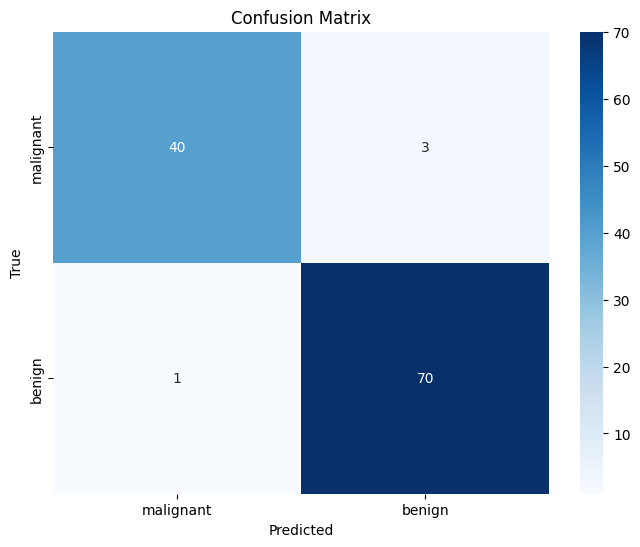

In [11]:
# prompt: 35.Train a Random Forest Classifier and visualize the confusion matrix.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset (assuming it's already loaded as 'data')
# If not loaded, uncomment the following line:
# data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


36.Train a Stacking Classifier using Decision Tree, SVM, and Logistic Regression, and compare accuracy.

In [10]:
# prompt: 36.Train a Stacking Classifier using Decision Tree, SVM, and Logistic Regression, and compare accuracy.

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)), # probability=True for predict_proba
    ('lr', LogisticRegression(random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the StackingClassifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy}")

# Train individual classifiers for comparison
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred_ind = estimator.predict(X_test)
    accuracy_ind = accuracy_score(y_test, y_pred_ind)
    print(f"{name} Accuracy: {accuracy_ind}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9649122807017544
dt Accuracy: 0.9473684210526315
svm Accuracy: 0.9473684210526315
lr Accuracy: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

37.Train a Random Forest Classifier and print the top 5 most importance features.

In [9]:
# prompt: 37.Train a Random Forest Classifier and print the top 5 most importance features.

import pandas as pd
# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': feature_importances})

# Sort by importance and get top 5
top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Print the top 5 most important features
top_5_features


,Feature,Importance
23,worst area,0.153892
27,worst concave points,0.144663
7,mean concave points,0.106210
20,worst radius,0.077987
6,mean concavity,0.068001


38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [22]:
# prompt: 38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.metrics import precision_score, recall_score, f1_score

# Load the Breast Cancer dataset (assuming it's already loaded as 'data')
# If not loaded, uncomment the following line:
# data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier
# The 'base_estimator' argument has been changed to 'estimator'
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-score: 0.965034965034965


39.Train a Random Forest Classifier and analyz the effect of max_depth on accuracy.

In [7]:
# prompt: 39.Train a Random Forest Classifier and analyz the effect of max_depth on accuracy.

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Max depth values to try
max_depth_values = [None, 10, 20, 30, 40]

for max_depth in max_depth_values:
    # Create and train a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with max_depth={max_depth}: {accuracy}")


Accuracy with max_depth=None: 0.9649122807017544
Accuracy with max_depth=10: 0.9649122807017544
Accuracy with max_depth=20: 0.9649122807017544
Accuracy with max_depth=30: 0.9649122807017544
Accuracy with max_depth=40: 0.9649122807017544


40.Train a Bagging Regressor using different base estimators (Decision Tree KNeighbors) and compares performance.

In [21]:
# prompt: 40.Train a Bagging Regressor using different base estimators (Decision Tree KNeighbors) and compares performance.

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base estimators to try
base_estimators = {
    'Decision Tree': DecisionTreeRegressor(),
    'KNeighbors': KNeighborsRegressor()
}

for name, estimator in base_estimators.items():
  # Create and train a Bagging Regressor
  # The 'base_estimator' argument has been changed to 'estimator'
  bagging_regressor = BaggingRegressor(estimator=estimator, n_estimators=100, random_state=42)
  bagging_regressor.fit(X_train, y_train)

  # Make predictions
  y_pred = bagging_regressor.predict(X_test)

  # Evaluate the model using Mean Squared Error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error with {name} as base estimator: {mse}")

Mean Squared Error with Decision Tree as base estimator: 15815.26660224182
Mean Squared Error with KNeighbors as base estimator: 19135.010133135234


41.Train a Rondom Forest Classifier and evaluate its performance using ROC-AUC Score.

In [20]:
# prompt: 41.Train a Rondom Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier # Importing RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score # Importing roc_auc_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions (probabilities for ROC-AUC)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9952505732066819


42.Train a Bagging Classifier and evaluate its performance using cross-validation.

In [19]:
# prompt: 42.Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Create a Bagging Classifier
# The 'base_estimator' argument has been changed to 'estimator'
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.89473684 0.93859649 0.99122807 0.96491228 1.        ]
Mean cross-validation score: 0.9578947368421054


43.Train a Random Forest Classifier and plot the precision-Recall curve.

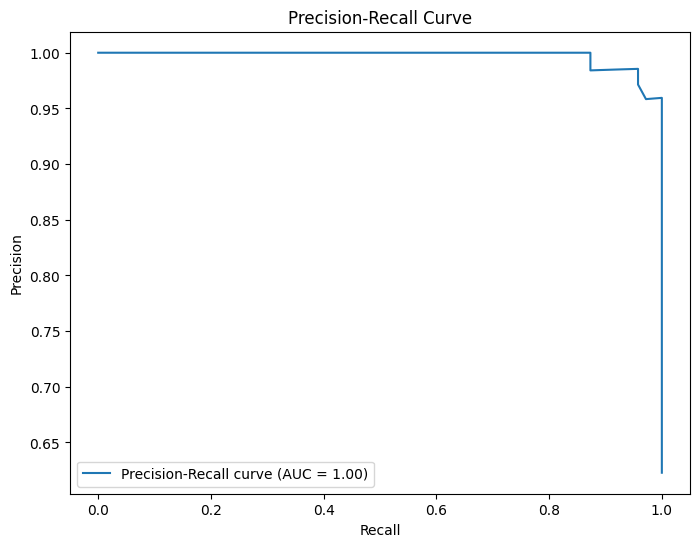

In [3]:
# prompt: 43.Train a Random Forest Classifier and plot the precision-Recall curve.

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Train a Random Forest Classifier (assuming data and train/test split are already defined)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = rf_classifier.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the area under the precision-recall curve (AUC)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


44.Train a Stacking Classifier with Random Forest and Logistic Regression and comapare acciracy.

In [2]:
# prompt: 44.Train a Stacking Classifier with Random Forest and Logistic Regression and comapare acciracy.

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the StackingClassifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate the accuracy of the Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")

# Train individual classifiers for comparison
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred_ind = estimator.predict(X_test)
    accuracy_ind = accuracy_score(y_test, y_pred_ind)
    print(f"{name} Accuracy: {accuracy_ind}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.956140350877193
rf Accuracy: 0.9649122807017544
lr Accuracy: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


45.Train a Bagging Regressor with different level of bootstrap sample and comapare performance.

In [44]:
# prompt: 45.Train a Bagging Regressor with different level of bootstrap sample and comapare performance.

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bootstrap sample ratios to try
bootstrap_ratios = [0.5, 0.7, 0.9, 1.0]

for ratio in bootstrap_ratios:
  # Create and train a Bagging Regressor
  bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, max_samples=ratio, random_state=42)
  bagging_regressor.fit(X_train, y_train)

  # Make predictions
  y_pred = bagging_regressor.predict(X_test)

  # Evaluate the model using Mean Squared Error
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error with bootstrap ratio {ratio}: {mse}")


Mean Squared Error with bootstrap ratio 0.5: 16947.83061048976
Mean Squared Error with bootstrap ratio 0.7: 15406.723912929516
Mean Squared Error with bootstrap ratio 0.9: 15528.286177042313
Mean Squared Error with bootstrap ratio 1.0: 15815.26660224182
